<h1>Time Series Analysis of Policy Data</h1>

This analysis investigates the evolution of Stringency Index in different countries over time, with the death rate. 
For information of how it is calculated see the link https://covidtracker.bsg.ox.ac.uk, we use the API data instead of the csv files.

<b>Tasks:</b>
<ol>
    <li>Fill the df with json data</li>
    <li>Plot deaths and the stringency index over time for March and April</li>
    <li>Plot selected countries to see the affect of death toll on stringency</li>
</ol>

Retrieving the json from the API

In [1]:
import requests, json
# we are going to request only data from April and March from the OXFORD policy tracker API
url = 'https://covidtrackerapi.bsg.ox.ac.uk/api/stringency/date-range/2020-03-01/2020-04-24'
r = requests.get(url)
json_data = r.json()

In [2]:
import pandas as pd
df= pd.DataFrame(json_data['data'])
df.head()

# we have to flatten the json, to extract each country date entry
data = json_data['data']
time_series = []

for d in data:
    for c in data[d]:
        time_series.append(data[d][c])


In [3]:
df_test = pd.DataFrame(time_series)
df_test.head()

,date_value,country_code,confirmed,deaths,stringency_actual,stringency,stringency_legacy,stringency_legacy_disp
0,2020-03-01,AFG,1.0,0.0,19.05,19.05,23.81,23.81
1,2020-03-01,ARE,21.0,0.0,16.27,16.27,19.29,19.29
2,2020-03-01,AUS,26.0,1.0,19.44,19.44,22.86,22.86
3,2020-03-01,AUT,10.0,0.0,11.11,11.11,14.29,14.29
4,2020-03-01,AZE,1.0,0.0,19.44,19.44,22.86,22.86


We take a list of countries and plot the deaths vs stringency over time

In [4]:
df_test['date_value'] = pd.to_datetime(df_test['date_value'])

countries = ['GBR','SWE','ESP','DEU','ITA','CHN','USA']
df_selected = df_test[df_test['country_code'].isin(countries)]

(18322, 18376)

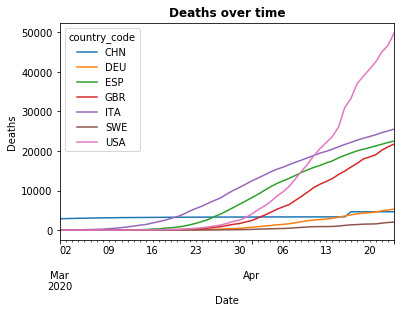

In [5]:
import matplotlib.pyplot as plt

df_pivot = df_selected.pivot(index='date_value', columns='country_code', values=['stringency','deaths'])
df_pivot.plot(y='deaths')
plt.title('Deaths over time', fontweight='semibold')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xlim('2020-03-01','2020-04-24')

Text(0.5, 1.0, 'Stringency over time')

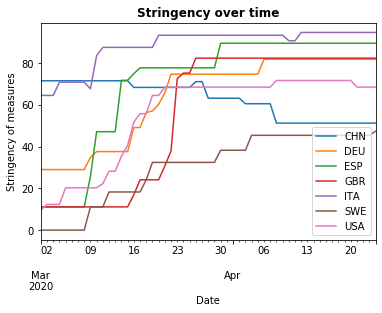

In [6]:
df_pivot.plot(y='stringency')
plt.xlabel('Date')
plt.ylabel('Stringency of measures')
plt.xlim('2020-03-01','2020-04-24')
plt.legend(loc=4)
plt.title('Stringency over time', fontweight='bold')

From this plot we can see that sweden can be highlighted as a case of increasing stringency of policy measures more gradually


In [7]:
df_pivot.index = pd.to_datetime(df_pivot.index)

Here we plot stringency and deaths side by side, to compare how countries reacted to the death toll 

In [10]:
# to be continued - to hide output

from traitlets.config import Config
import nbformat as nbf
from nbconvert.exporters import HTMLExporter

c = Config()

# Configure our tag removal
c.TagRemovePreprocessor.remove_cell_tags = ("remove_cell",)
c.TagRemovePreprocessor.remove_all_outputs_tags = ('remove_output',)
c.TagRemovePreprocessor.remove_input_tags = ('remove_input',)

# Configure and run out exporter
#c.HTMLExporter.preprocessors = ["TagRemovePreprocessor"]
#HTMLExporter(config=c).from_filename("Time Series Stringency Analysis Oxford.ipynb")

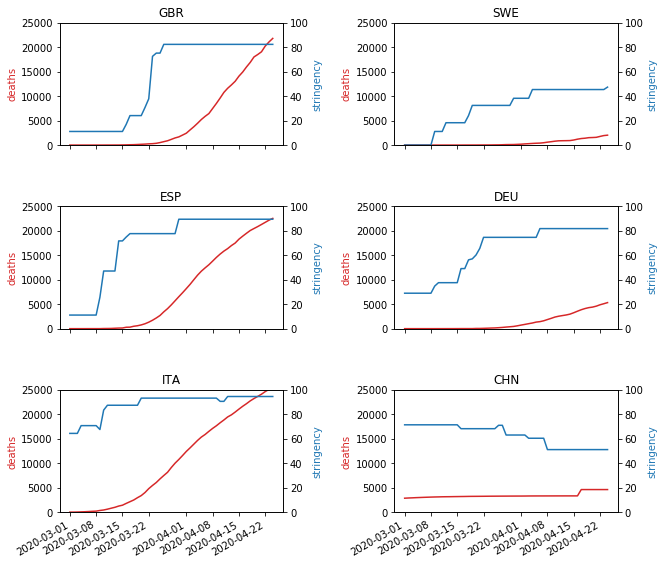

In [11]:
'remove_input'
# comparing only European countries plus china
eur = countries[:-1]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for ax, country in zip(axes.flatten(), eur):
    color = 'tab:red'
    ax.set_title(country)
    ax.plot(df_pivot['deaths',country],color=color, label='deaths')
    ax.set_ylabel('deaths', color=color)
    ax.tick_params(axis='y', )
    ax2 = ax.twinx()  
    ax.set_ylim(0,25000)
    
    color = 'tab:blue'
    ax2.set_ylabel('stringency', color=color)  
    ax2.plot(df_pivot['stringency', country],color=color,label='stringency')
    ax2.tick_params(axis='y')
    ax2.set_ylim(0,100)
fig.autofmt_xdate()
plt.show()